### 1 / 1 / (a)

Mean of g1 =  3.058 
Variance of g1 =  2.863499 


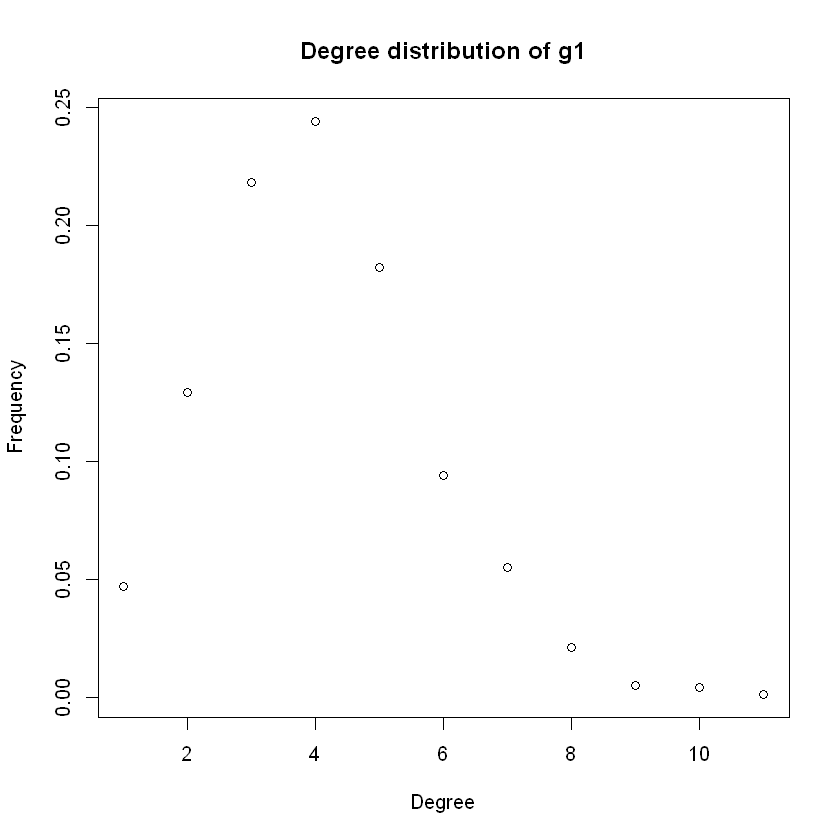

In [10]:
library('igraph')

g1 <- erdos.renyi.game(1000, 0.003, directed=F)
degVec1 <- degree(g1)
cat("Mean of g1 = ", mean(degVec1), "\n")
cat("Variance of g1 = ", var(degVec1), "\n")
plot(degree.distribution(g1), main="Degree distribution of g1", xlab="Degree", ylab="Frequency")

Mean of g2 =  3.886 
Variance of g2 =  3.874879 


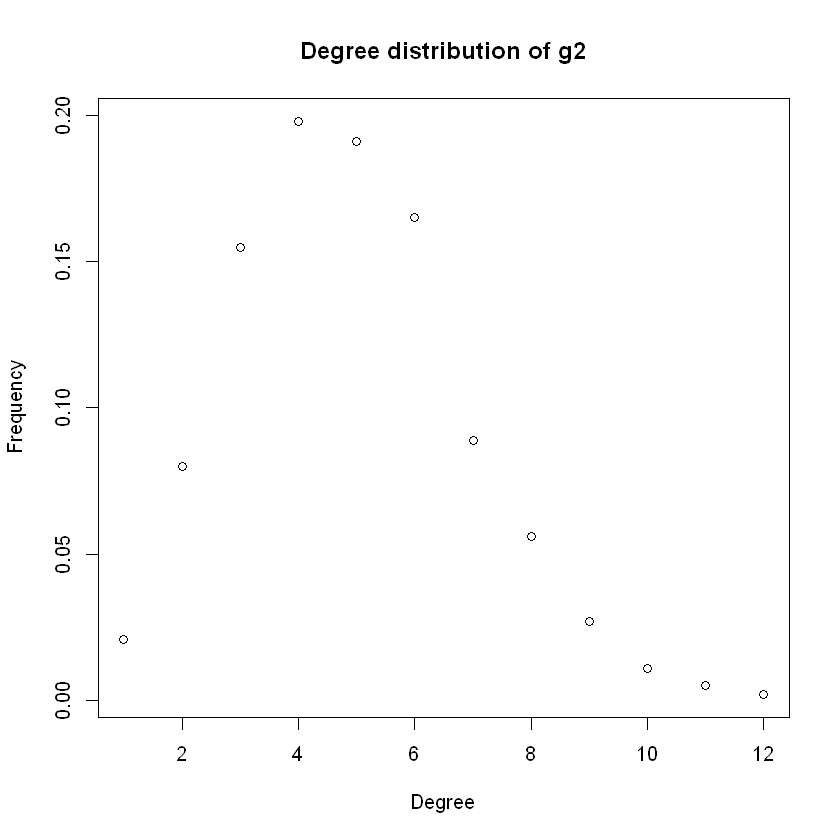

In [11]:
g2 <- erdos.renyi.game(1000, 0.004, directed=F)
degVec2 <- degree(g2)
cat("Mean of g2 = ", mean(degVec2), "\n")
cat("Variance of g2 = ", var(degVec2), "\n")
plot(degree.distribution(g2), main="Degree distribution of g2", xlab="Degree", ylab="Frequency")

Mean of g3 =  10.186 
Variance of g3 =  10.44185 


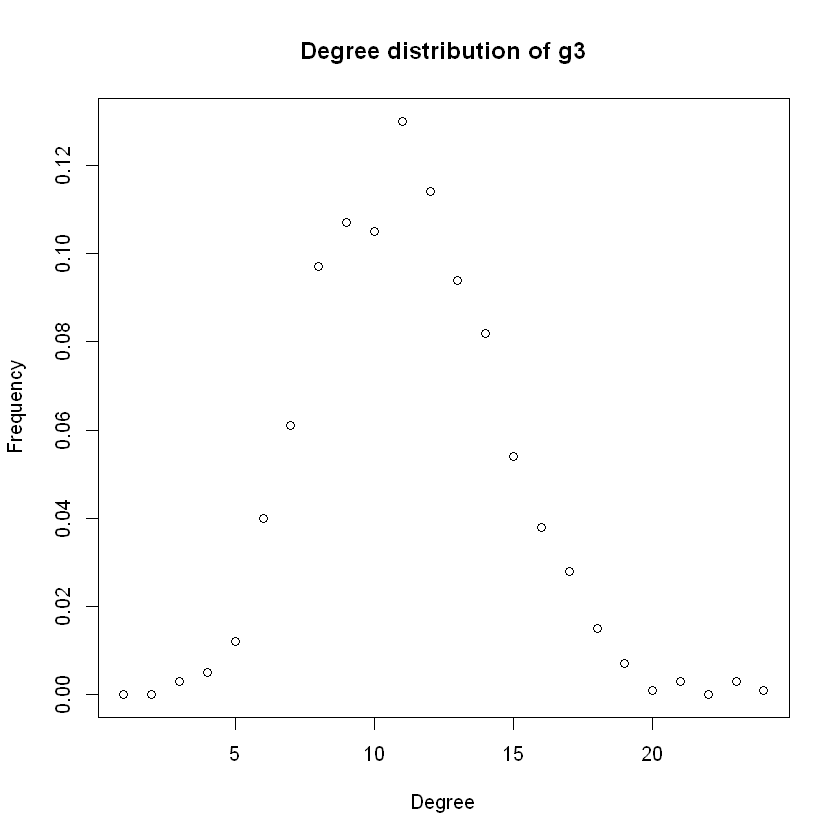

In [12]:
g3 <- erdos.renyi.game(1000, 0.01, directed=F)
degVec3 <- degree(g3)
cat("Mean of g3 = ", mean(degVec3), "\n")
cat("Variance of g3 = ", var(degVec3), "\n")
plot(degree.distribution(g3), main="Degree distribution of g3", xlab="Degree", ylab="Frequency")

Mean of g4 =  50.352 
Variance of g4 =  45.57767 


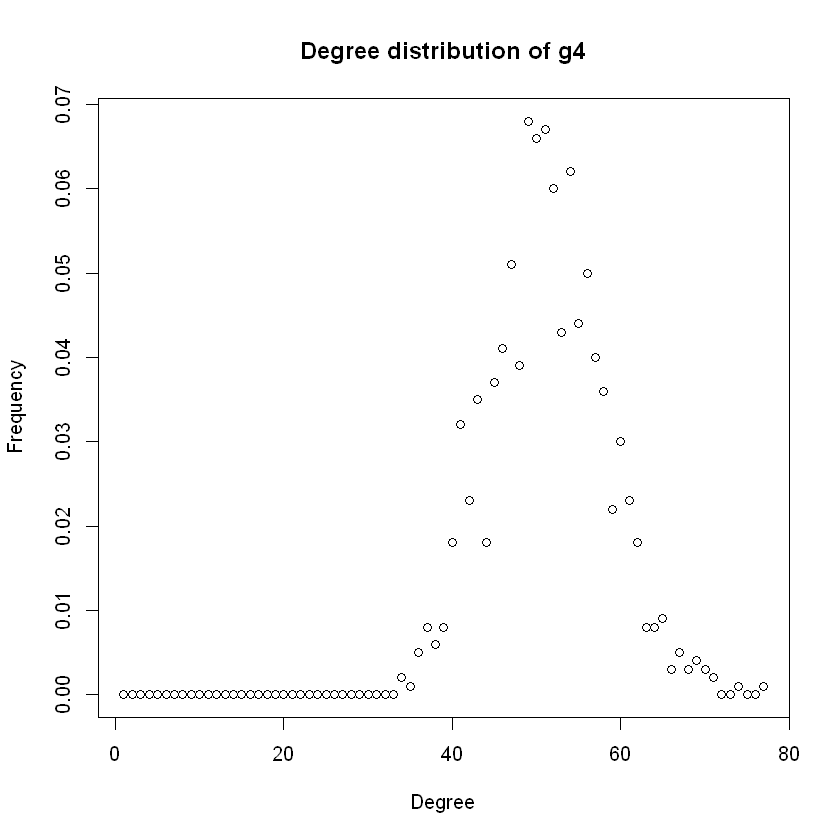

In [13]:
g4 <- erdos.renyi.game(1000, 0.05, directed=F)
degVec4 <- degree(g4)
cat("Mean of g4 = ", mean(degVec4), "\n")
cat("Variance of g4 = ", var(degVec4), "\n")
plot(degree.distribution(g4), main="Degree distribution of g4", xlab="Degree", ylab="Frequency")

Mean of g5 =  99.768 
Variance of g5 =  94.06424 


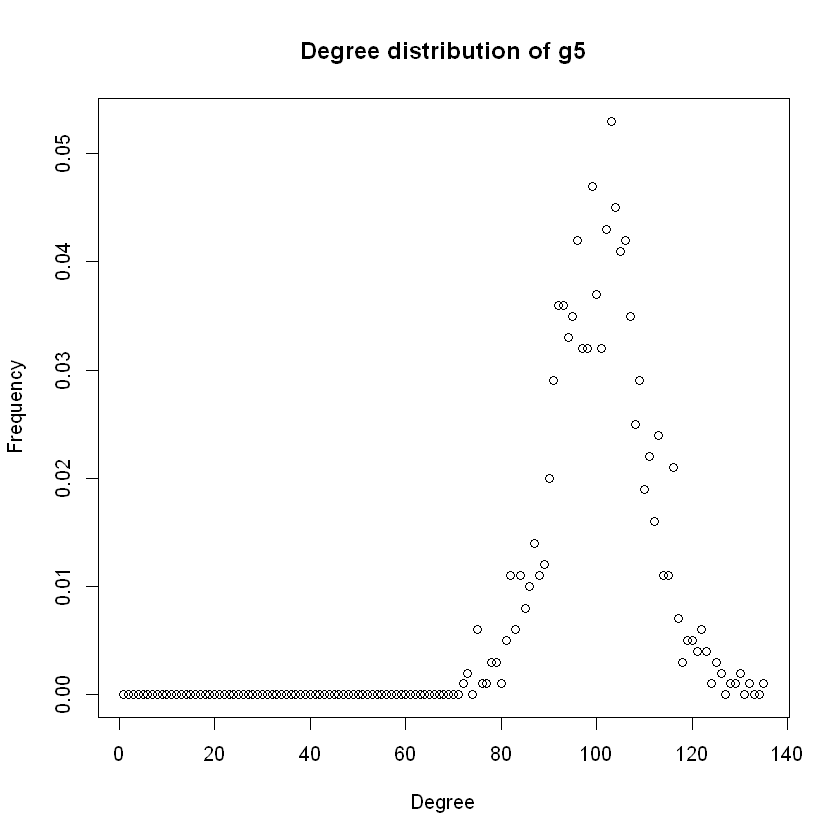

In [14]:
g5 <- erdos.renyi.game(1000, 0.1, directed=F)
degVec5 <- degree(g5)
cat("Mean of g5 = ", mean(degVec5), "\n")
cat("Variance of g5 = ", var(degVec5), "\n")
plot(degree.distribution(g5), main="Degree distribution of g5", xlab="Degree", ylab="Frequency")

### 1 / 1 / (b)

In [7]:
cat("g1 is connected:", is.connected(g1), "\n")
cat("g2 is connected:", is.connected(g2), "\n")
cat("g3 is connected:", is.connected(g3), "\n")
cat("g4 is connected:", is.connected(g4), "\n")
cat("g5 is connected:", is.connected(g5), "\n")

g1 is connected: FALSE 
g2 is connected: FALSE 
g3 is connected: TRUE 
g4 is connected: TRUE 
g5 is connected: TRUE 


In [12]:
g1.components <- clusters(g1)
idx <- which.max(g1.components$csize)
g1.giant <- induced.subgraph(g1, which(g1.components$membership == idx))
num_node_g1 = vcount(g1.giant)
cat("g1 GCC diameter:", diameter(g1.giant, directed=F), "\n")
cat("g1 GCC size:", num_node_g1, "\n\n")


g2.components <- clusters(g2)
idx <- which.max(g2.components$csize)
g2.giant <- induced.subgraph(g2, which(g2.components$membership == idx))
num_node_g2 = vcount(g2.giant)
cat("g2 GCC diameter:", diameter(g2.giant, directed=F), "\n")
cat("g2 GCC size:", num_node_g2, "\n\n")


g3.components <- clusters(g3)
idx <- which.max(g3.components$csize)
g3.giant <- induced.subgraph(g3, which(g3.components$membership == idx))
num_node_g3 = vcount(g3.giant)
cat("g3 GCC diameter:", diameter(g3.giant, directed=F), "\n")
cat("g3 GCC size:", num_node_g3, "\n\n")


g4.components <- clusters(g4)
idx <- which.max(g4.components$csize)
g4.giant <- induced.subgraph(g4, which(g4.components$membership == idx))
num_node_g4 = vcount(g4.giant)
cat("g4 GCC diameter:", diameter(g4.giant, directed=F), "\n")
cat("g4 GCC size:", num_node_g4, "\n\n")


g5.components <- clusters(g5)
idx <- which.max(g5.components$csize)
g5.giant <- induced.subgraph(g5, which(g5.components$membership == idx))
num_node_g5 = vcount(g5.giant)
cat("g5 GCC diameter:", diameter(g5.giant, directed=F), "\n")
cat("g5 GCC size:", num_node_g5, "\n\n")

g1 GCC diameter: 13 
g1 GCC size: 955 

g2 GCC diameter: 11 
g2 GCC size: 980 

g3 GCC diameter: 6 
g3 GCC size: 1000 

g4 GCC diameter: 3 
g4 GCC size: 1000 

g5 GCC diameter: 3 
g5 GCC size: 1000 



### 1 / 1 / (c)

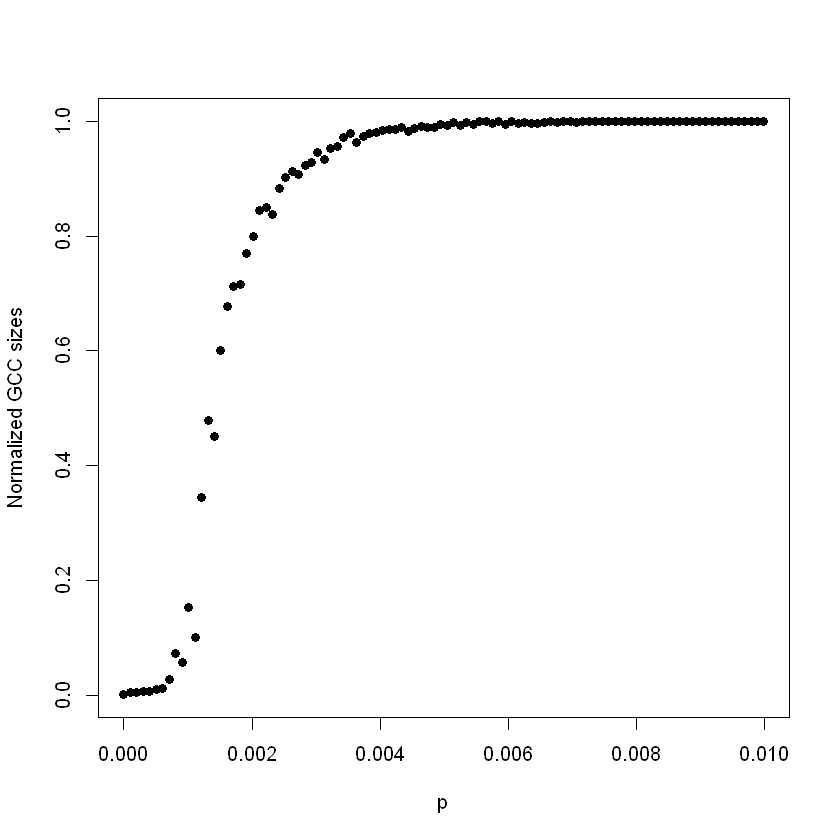

In [18]:
p_seq <- seq(0, 0.01, 0.000101010)
norm_size_seq <- vector("list", 100)
for(i in 1:length(p_seq)){
    p_cur <- p_seq[i]
    g_cur <- erdos.renyi.game(1000, p_cur, directed=F)
    g_cur.components <- clusters(g_cur)
    idx <- which.max(g_cur.components$csize)
    g_cur.giant <- induced.subgraph(g_cur, which(g_cur.components$membership == idx))
    norm_size_seq[i] <- vcount(g_cur.giant) / 1000
}

plot(p_seq, norm_size_seq, xlab="p", ylab="Normalized GCC sizes", pch=19)

### 1 / 1 / (d)

When c is  0.5 , GCC average size is:  15.26613 


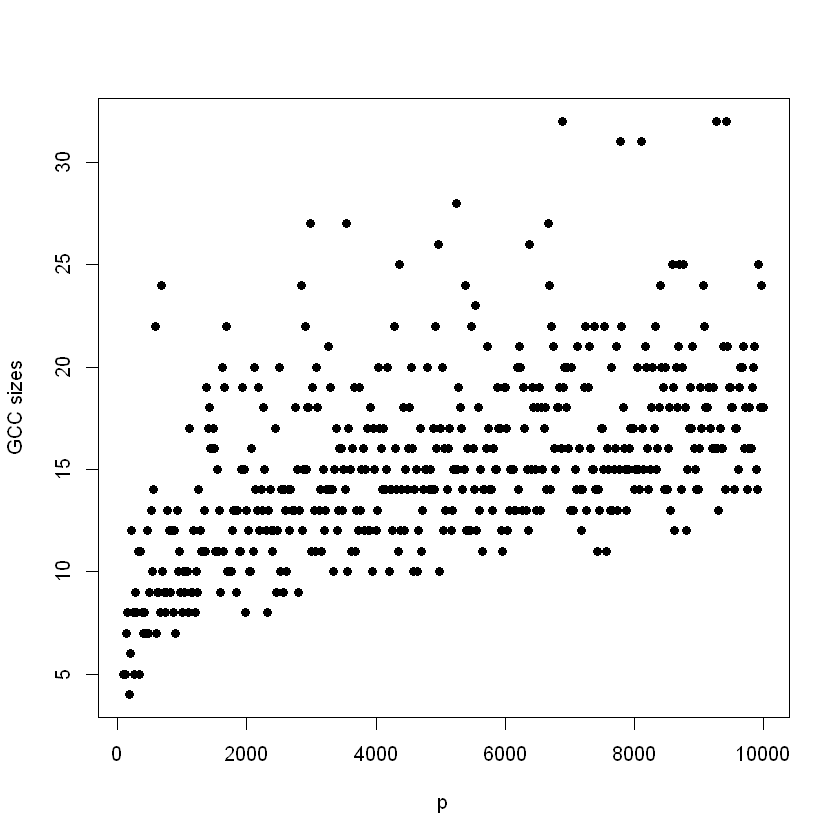

In [29]:
c <- 0.5
n_seq <- seq(100, 10000, 20)
size_seq <- vector("list", length(n_seq))
size_mean <- 0
for(i in 1:length(n_seq)){
  n_cur <- n_seq[i]
  g_cur <- erdos.renyi.game(n_cur, c/n_cur, directed=F)
  g_cur.components <- clusters(g_cur)
  idx <- which.max(g_cur.components$csize)
  g_cur.giant <- induced.subgraph(g_cur, which(g_cur.components$membership == idx))
  size_seq[i] <- vcount(g_cur.giant)
  size_mean <- size_mean + vcount(g_cur.giant)
}
size_mean <- size_mean / length(n_seq)

cat("When c is ", c, ", GCC average size is: ", size_mean, "\n")
plot(n_seq, size_seq, xlab="p", ylab="GCC sizes", pch=19)

When c is  1 , GCC average size is:  260.2923 


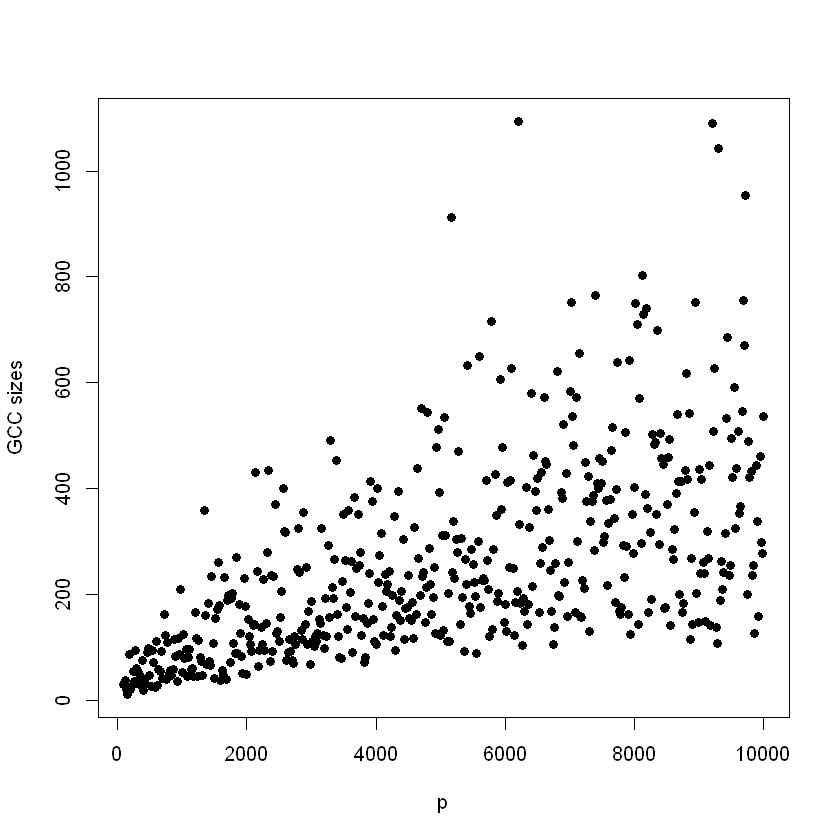

In [30]:
c <- 1
n_seq <- seq(100, 10000, 20)
size_seq <- vector("list", length(n_seq))
size_mean <- 0
for(i in 1:length(n_seq)){
    n_cur <- n_seq[i]
    g_cur <- erdos.renyi.game(n_cur, c/n_cur, directed=F)
    g_cur.components <- clusters(g_cur)
    idx <- which.max(g_cur.components$csize)
    g_cur.giant <- induced.subgraph(g_cur, which(g_cur.components$membership == idx))
    size_seq[i] <- vcount(g_cur.giant)
    size_mean <- size_mean + vcount(g_cur.giant)
}
size_mean <- size_mean / length(n_seq)

cat("When c is ", c, ", GCC average size is: ", size_mean, "\n")
plot(n_seq, size_seq, xlab="p", ylab="GCC sizes", pch=19)

When c is  1.1 , GCC average size is:  833.5444 
When c is  1.2 , GCC average size is:  1540.502 
When c is  1.3 , GCC average size is:  2125.671 


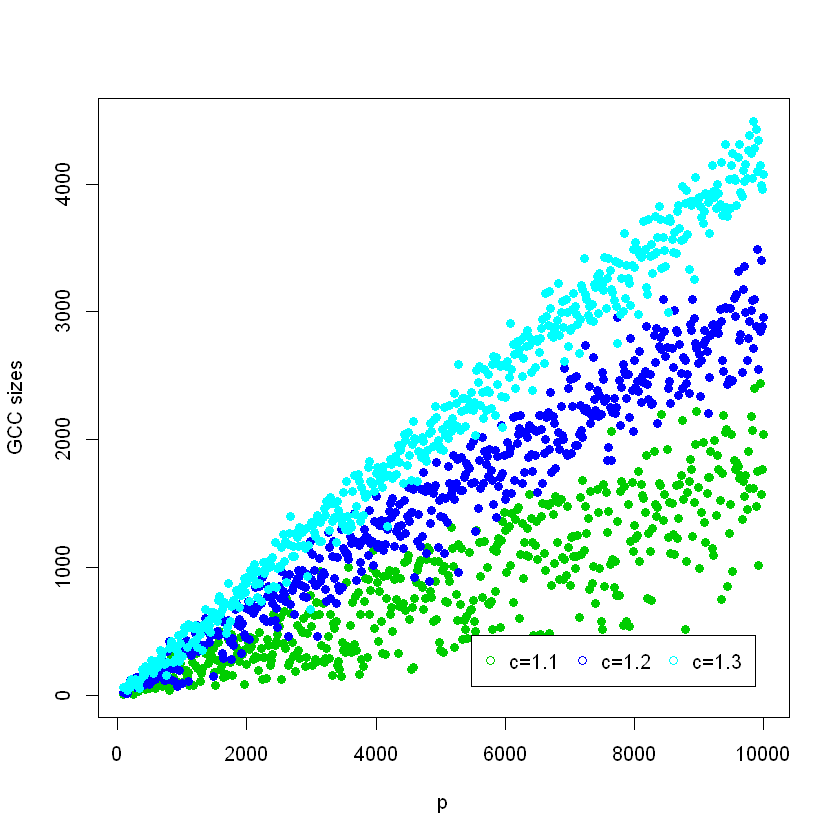

In [8]:
c <- c(1.1, 1.2, 1.3)
n_seq <- seq(100, 10000, 20)
size_seq <- matrix(, nrow=length(c), ncol=length(n_seq))
size_mean <- rep(0, length(n_seq))
for(j in 1:length(c)){
    c_cur <- c[j]
    for(i in 1:length(n_seq)){
        n_cur <- n_seq[i]
        g_cur <- erdos.renyi.game(n_cur, c_cur/n_cur, directed=F)
        g_cur.components <- clusters(g_cur)
        idx <- which.max(g_cur.components$csize)
        g_cur.giant <- induced.subgraph(g_cur, which(g_cur.components$membership == idx))
        size_seq[j, i] <- vcount(g_cur.giant)
        size_mean[j] <- size_mean[j] + vcount(g_cur.giant)
    }
    size_mean[j] <- size_mean[j] / length(n_seq)
    cat("When c is ", c_cur, ", GCC average size is: ", size_mean[j], "\n")
}

matplot(n_seq, cbind(size_seq[1, ], size_seq[2, ], size_seq[3, ]), col=c(3,4,5), pch=19, xlab="p", ylab="GCC sizes")
legend("bottomright", inset=.05, legend=c("c=1.1", "c=1.2", "c=1.3"), col=c(3,4,5), pch=1, horiz=TRUE)
# x11()
# plot(n_seq, size_seq[1, ], col="blue", pch = 19, xlab="p", ylab="GCC sizes")
# par(new=TRUE)
# plot(n_seq, size_seq[2, ], col="red", pch = 19, xlab="p", ylab="GCC sizes")
# par(new=TRUE)
# plot(n_seq, size_seq[3, ], col="black", pch = 19, xlab="p", ylab="GCC sizes")

### 1 / 2 / (a)

In [15]:
g6 <- barabasi.game(1000, m=1, directed=FALSE)
cat("g6 is connected:", is.connected(g6), "\n")

g6 is connected: TRUE 


### 1 / 2 / (b)

In [18]:
fg6 <- fastgreedy.community(g6)
cmsize6 <- sizes(fg6)
print(cmsize6)

Community sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
49 41 45 49 48 36 40 44 38 36 37 39 33 32 28 27 26 26 23 23 23 24 24 23 21 20 
27 28 29 30 31 32 33 34 35 
24 17 18 16 15 13 14 14 14 


### 1 / 2 / (c)

In [19]:
g7 <- barabasi.game(10000, m=1, directed=FALSE)
fg7 <- fastgreedy.community(g7)
cmsize7 <- sizes(fg7)
print(cmsize7)

Community sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
143 154 251 163 138 143 176 161 194 136 138 149 155 132 148 142 140 146 161 131 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
135 158 130 145 127 121 128 131 117 110 131 175 114 113 132 104 105 100 108  98 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
102  97  98  95  96  97  96  92  92  88  91  85  98  96  85 102  88 101  81  87 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
 84  79  78  83  77  75  78  69  68  76  67  71  66  77  68  67  67  65  62  64 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
 61  63  64  57  67  57  56  56  58  52  59  53  49  47  45  46  36  37  33  32 
101 102 103 
 30  28  23 
